## Stock Market Prediction

### Random Forest and Linear regression algorithm for Time Series Analysis

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import sklearn.preprocessing as prep

from matplotlib.pyplot import rcParams
from datetime import date
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [91]:
df= pd.read_csv('C:/Users/DELL/Downloads/groupeddf.csv')
df.head(10)

,Code,Date,Open,High,Low,Close,Volume
0,3IINFOTECH,2014-12-18,7.437910,7.446311,7.427869,7.435041,2538.135246
1,3IINFOTECH,2014-12-19,7.582241,7.597414,7.571207,7.583621,2778.203448
2,3IINFOTECH,2014-12-22,7.782296,7.793385,7.769650,7.781907,6414.482490
3,3IINFOTECH,2014-12-23,7.771465,7.778030,7.762879,7.769444,1944.929293
4,3IINFOTECH,2014-12-24,8.321127,8.347465,8.294648,8.321972,10216.726761
5,3IINFOTECH,2014-12-26,8.499172,8.517881,8.485762,8.504636,52045.635762
6,3IINFOTECH,2014-12-29,9.390217,9.418071,9.358560,9.386957,21635.451087
7,3IINFOTECH,2014-12-30,9.121958,9.140356,9.106677,9.124332,6166.682493
8,3IINFOTECH,2014-12-31,9.409392,9.434392,9.388122,9.410359,12830.422652
9,3IINFOTECH,2015-01-01,9.611657,9.631461,9.592275,9.612921,14989.721910


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79322 entries, 0 to 79321
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Code    79322 non-null  object 
 1   Date    79322 non-null  object 
 2   Open    79322 non-null  float64
 3   High    79322 non-null  float64
 4   Low     79322 non-null  float64
 5   Close   79322 non-null  float64
 6   Volume  79322 non-null  float64
dtypes: float64(5), object(2)
memory usage: 4.2+ MB


In [93]:
unique_values = df["Code"].unique()
len(unique_values)

442

In [94]:
df1=df.set_index("Code")

In [95]:
grouped_df=pd.DataFrame()

for i in unique_values:
    df2 = (df1.loc[i,:]).groupby(['Code','Date']).mean()
    grouped_df=grouped_df.append(df2)
grouped_df.reset_index()
del df2

In [96]:
df3=grouped_df.loc["8KMILES",:]
df4=df3.reset_index()
label=df4['Date'].values.tolist()
trainset=df4['Open'].values.tolist()
df4

,Date,Open,High,Low,Close,Volume
0,2014-12-18,561.963918,562.615636,561.317698,562.008419,148.219931
1,2014-12-19,588.985235,589.995805,588.078859,589.031208,335.969799
2,2014-12-22,603.079123,603.608772,602.417544,603.047193,169.870175
3,2014-12-23,600.358528,600.876254,599.931438,600.357692,97.444816
4,2014-12-24,588.538106,589.038987,588.018722,588.531498,117.449339
...,...,...,...,...,...,...
178,2015-09-24,1425.896581,1426.803205,1425.048077,1425.834615,85.448718
179,2015-09-28,1413.101322,1413.839868,1412.314537,1412.951322,71.374449
180,2015-09-29,1383.679461,1384.679253,1382.544606,1383.513900,82.506224
181,2015-09-30,1400.488693,1400.946985,1399.891960,1400.346734,54.628141


In [97]:
def ds(dataset,past=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-past-1):
        j = dataset[i:(i+past), 0]
        dataX.append(j)
        dataY.append(dataset[i + past, 0])
    return np.array(dataX), np.array(dataY)

In [98]:
def test_train_func(prices):
    scaler = MinMaxScaler(feature_range=(0, 1))
    prices = scaler.fit_transform(prices)
    trainsize = int(len(prices) * 0.80)
    testsize = len(prices) - trainsize
    train, test = prices[0:trainsize,:], prices[trainsize:len(prices),:]
    print(len(train), len(test))
    
    x_train,y_train = ds(train,1)
    x_test,y_test = ds(test,1)
    
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.fit_transform(x_test)
    
    return x_train,y_train, x_test,y_test

In [99]:
prices = df4['Close'].values.astype('float32') 
prices = prices.reshape(len(prices), 1)
prices.shape

(183, 1)

In [100]:
trainX, trainY, testX, testY = test_train_func(prices)

146 37


In [101]:
randomforest  = RandomForestRegressor(random_state=1,verbose=2,n_jobs=5)
randomforest.fit(trainX,trainY)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100building tree 7 of 100
building tree 8 of 100

building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100building tree 13 of 100

building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100building tree 18 of 100

building tree 19 of 100building tree 20 of 100

building tree 21 of 100
building tree 22 of 100building tree 23 of 100
building tree 24 of 100building tree 25 of 100


building tree 26 of 100
building tree 27 of 100building tree 28 of 100

building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100building tree 33 of 100building tree 34 of 100building tree 35 of 100


building tree 36 of 100

building tree 37 of 100
building tree 38 of 100building tree 39 of 100
building tree 40 of 100

building tree 41 of 100
building tree 42 of 100bu

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=5, oob_score=False,
                      random_state=1, verbose=2, warm_start=False)

In [102]:
test=[]
test= randomforest.predict(testX)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished


In [103]:
testY

array([0.3665992 , 0.34853208, 0.3367042 , 0.3455994 , 0.36045766,
       0.37352097, 0.3716843 , 0.46163356, 0.49432492, 0.4646306 ,
       0.42408788, 0.57748544, 0.7374294 , 0.7817353 , 0.75124586,
       0.7573086 , 0.76831853, 0.8345448 , 0.79339325, 0.8194858 ,
       0.82750404, 0.94312084, 0.9119475 , 0.9489646 , 0.9445609 ,
       0.95504785, 0.98091006, 0.97550523, 1.        , 0.99246335,
       0.9764079 , 0.9988419 , 0.9839449 , 0.94990647, 0.96937025],
      dtype=float32)

In [104]:
# For Random Forest
math.sqrt(mean_squared_error(test,testY))

0.5016376801744173

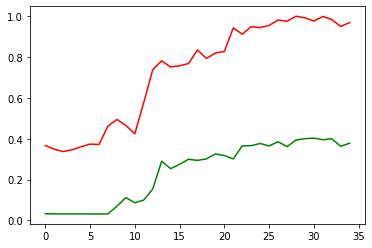

In [105]:
# For Random Forest
plt.plot(test,color="green")
plt.plot(testY,color='red')
plt.show()

In [106]:
regr = linear_model.LinearRegression()
regr.fit(trainX, trainY)
test= regr.predict(testX)

In [107]:
# For Linear Regression
math.sqrt(mean_squared_error(test,testY))

0.5048180544142529

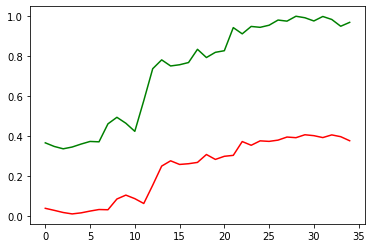

In [108]:
# For Linear Regression
plt.plot(test,color="red")
plt.plot(testY,color='green')
plt.show()

___